In [5]:
import torch
from google.colab import files
from IPython.display import Image
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [36]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
import numpy as np
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils, datasets,models
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [6]:
cd '/gdrive/My Drive/Colab Notebooks/speech'

/gdrive/My Drive/Colab Notebooks/speech


In [38]:
'''
!wget https://zenodo.org/record/2867216/files/26_29_09_2017_KCL.zip?download=1
!unzip '26_29_09_2017_KCL.zip?download=1'
'''

"\n!wget https://zenodo.org/record/2867216/files/26_29_09_2017_KCL.zip?download=1\n!unzip '26_29_09_2017_KCL.zip?download=1'\n"

In [39]:
import librosa
audio_path = '26-29_09_2017_KCL/ReadText/PD/ID13_pd_3_2_2.wav'
x , sr = librosa.load(audio_path)

In [40]:
import IPython.display as ipd
ipd.Audio(audio_path)

Output hidden; open in https://colab.research.google.com to view.

# Feature Extraction

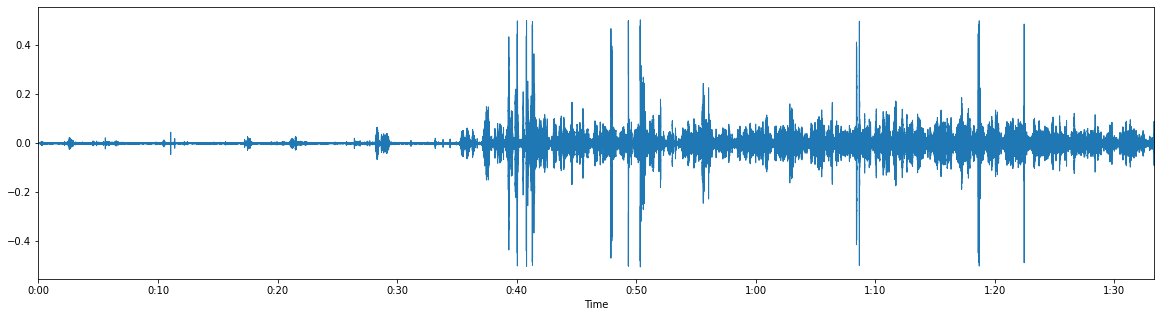

In [47]:
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(20, 5))
librosa.display.waveplot(x, sr=sr)

In [48]:
x

array([-2.1376502e-06,  1.9433005e-06, -1.6093279e-06, ...,
       -7.0213944e-02, -7.9579324e-02,  0.0000000e+00], dtype=float32)

1. Zero Crossing Rate

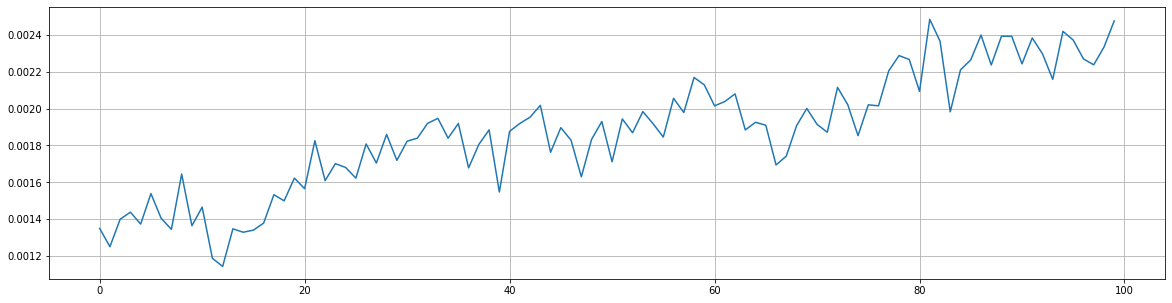

In [49]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(20, 5))
plt.plot(x[n0:n1])
plt.grid()

In [50]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
zero_crossings.shape

(100,)

In [51]:
print(sum(zero_crossings))

0


2.Spectral Centroid

In [52]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

(4021,)

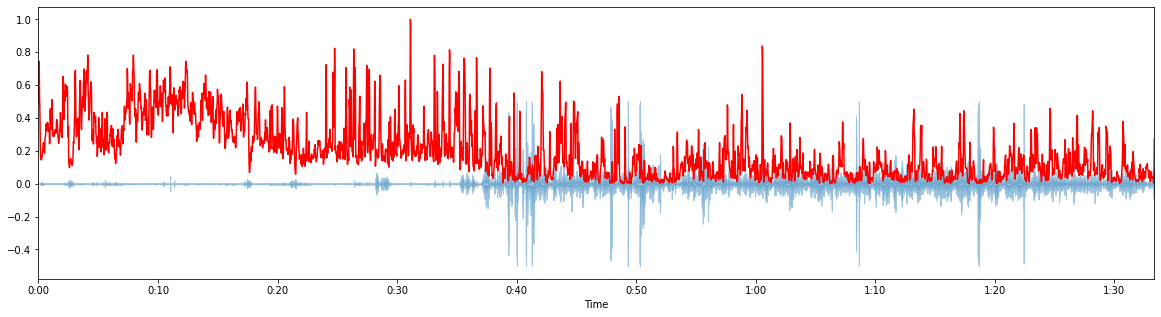

In [53]:
# Computing the time variable for visualization
plt.figure(figsize=(20,5))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

3.Spectral Rolloff

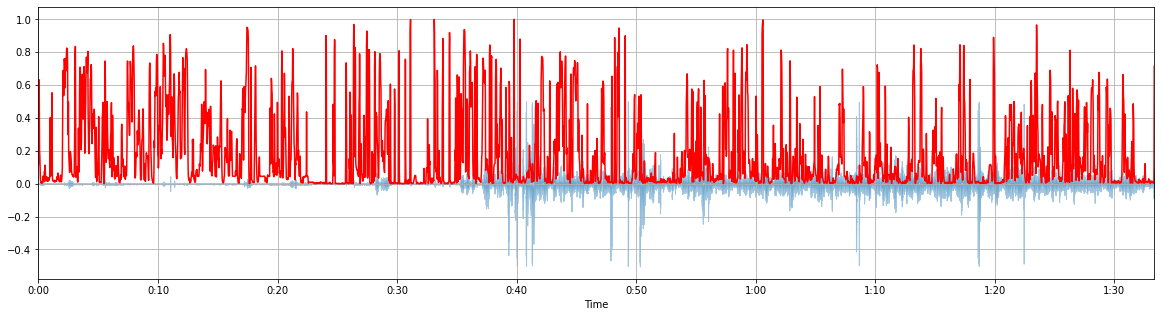

In [54]:
plt.figure(figsize=(20,5))
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.grid()

4.MFCC - Mel-frequency cepstral coefficients (MFCCs) are coefficients that collectively make up an MFC. They are derived from a type of cepstral representation of the audio clip (a nonlinear "spectrum-of-a-spectrum").

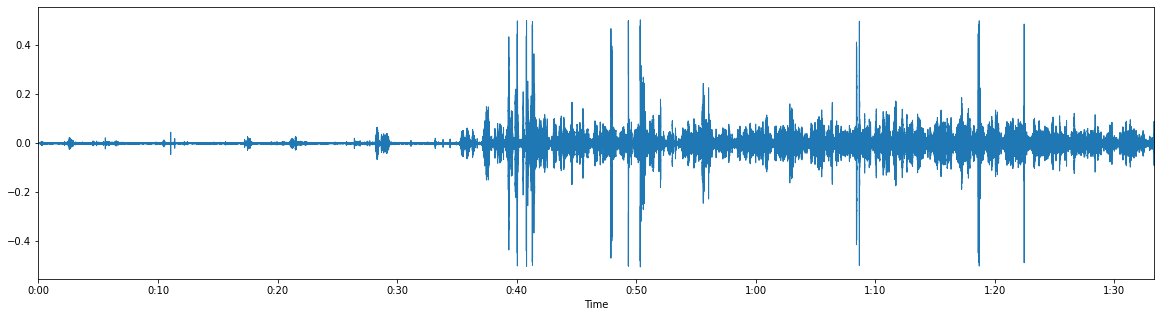

In [55]:
plt.figure(figsize=(20,5))
x, fs = librosa.load('26-29_09_2017_KCL/ReadText/PD/ID13_pd_3_2_2.wav')
librosa.display.waveplot(x, sr=sr)

(20, 4021)


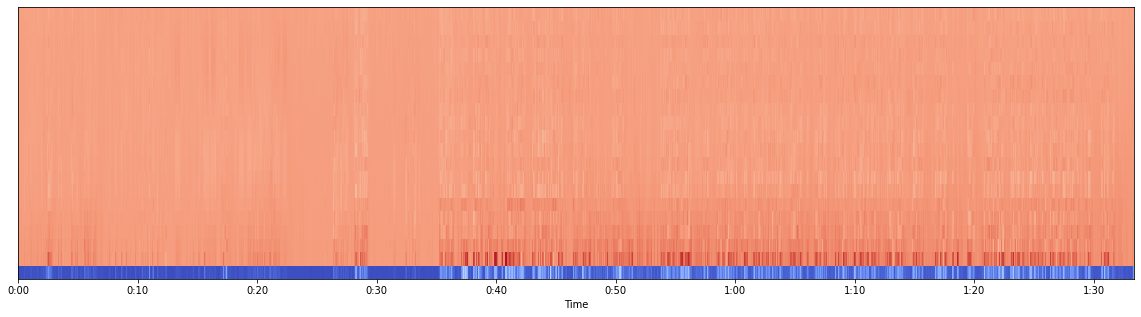

In [57]:
# MFCC
plt.figure(figsize=(20,5))
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sr, x_axis='time')

Feature Scaling
Let's scale the MFCCs such that each coefficient dimension has zero mean and unit variance:

In [58]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[ 0.0000000e+00  0.0000000e+00  0.0000000e+00  1.5179099e-08
  0.0000000e+00  3.0358198e-08 -1.5179099e-08 -9.4869366e-09
  0.0000000e+00  0.0000000e+00  0.0000000e+00  5.6921619e-09
  0.0000000e+00  0.0000000e+00  0.0000000e+00 -3.7947747e-09
 -3.7947747e-09 -7.5895494e-09 -1.8973874e-09 -7.5895494e-09]
[1.         1.         0.9999999  1.0000001  1.         1.0000001
 1.         0.99999994 1.0000001  1.         1.         1.
 0.99999994 1.0000001  0.9999999  1.0000002  1.0000001  1.
 1.         1.0000001 ]


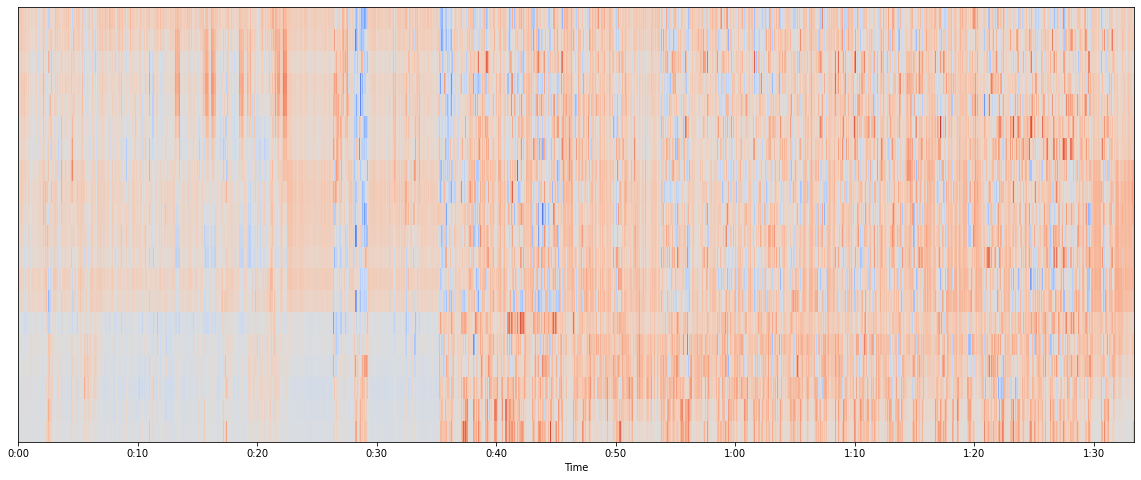

In [59]:
plt.figure(figsize=(20,8))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

Chroma Frequencies

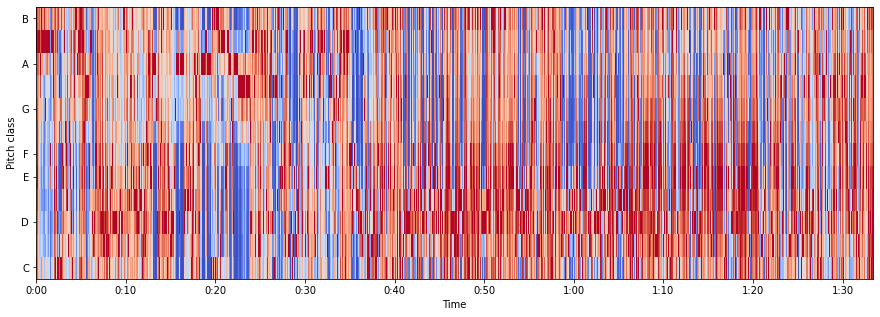

In [60]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

# CLASSIFICATION (data from http://archive.ics.uci.edu/ml/datasets/Parkinsons)

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [ ]:
'''
Attribute Information:

Matrix column entries (attributes):
name - ASCII subject name and recording number
MDVP:Fo(Hz) - Average vocal fundamental frequency
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
MDVP:Flo(Hz) - Minimum vocal fundamental frequency
MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
measures of variation in fundamental frequency
MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
NHR,HNR - Two measures of ratio of noise to tonal components in the voice
status - Health status of the subject (one) - Parkinson's, (zero) - healthy
RPDE,D2 - Two nonlinear dynamical complexity measures
DFA - Signal fractal scaling exponent
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 
'''

In [10]:
df = pd.read_csv('parkinsons.csv')

In [15]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [13]:
df1 = df.drop('name',axis = 1)

In [16]:
X = df1[df1.columns.difference(['status'])]
y = df1['status']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [21]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
y_pred = model.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9333333333333333